#  SOLVING CALCULUS PROBLEMS
## Functions and Limits

In [1]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

##  What Is a Function?

Let’s start out with some basic definitions. A function is a mapping between an input set and an output set. The special condition of a function is that an element of the input set is related to exactly one element of the output set. For example, Figure 1-1 shows two sets such that an element of the output set is the square of an element that belongs to the input set.

<img src='function_map.png', style='width:350px' />

*Figure 1-1: A function describes a mapping between an input set and an output set. Here, an element of the output set is the square of an element from the input set.*

Using the familiar function notation, we’d write this function as $f(x) = x^2$, where $x$ is the independent variable quantity. So $f(2) = 4$, &nbsp; $f(100) = 10000$, and so on. We refer to $x$ as the independent variable quantity because we’re free to assume a value for it as long as that value is within its domain (see the next section).

Functions can also be defined in terms of multiple variables. For example, $f(x, y) = x^2 + y^2$ defines a function of two variables, $x$ and $y$.

### *Domain and Range of a Function*

The *domain* of a function is the set of input values that the independent variable can validly assume. The output set of a function is called the *range*.
For example, the domain of the function $f(x) = 1/x$ is all nonzero real and complex numbers because $1/0$ isn’t defined. The range is formed by the set of values obtained by substituting each number in the domain into $1/x$, so in this case it is also all nonzero real and complex numbers.

**NOTE**
*The domain and range of a function can certainly be different. For example, for the function $x^2$, the domain is all positive and negative numbers, but the range is only the positive numbers.*

### *An Overview of Common Mathematical Functions*

We’ve already used a number of common mathematical functions from the Python standard library’s *math* module. A couple of familiar examples are the *sin( )* and *cos( )* functions, which correspond to the trigonometric functions sine and cosine. Other trigonometric functions &mdash; *tan( )* and the inverse equivalents of these functions, *asin( )*, *acos( )*, and *atan( )* &mdash; are also defined.

The `math` module also includes functions that find the logarithm of a number—the natural logarithm function `log()`, the base-2 logarithm `log2()`, and the base-10 logarithm `log10()`—as well as the function `exp()`, which finds the value of $e^x$, where $e$ is Euler’s number (approximately 2.71828).

One drawback of all these functions is that they’re not suitable for working with symbolic expressions. If we want to manipulate a mathematical expression involving symbols, we have to start using the equivalent functions defined by SymPy.

Let’s see a quick example:

In [2]:
import math
math.sin(math.pi/2)

1.0

Here, we find the sine of the angle π/2 using the `sin()` function defined by the standard library’s `math` module. Then, we can do the same using SymPy.

In [3]:
import sympy
sympy.sin(math.pi/2)

1.00000000000000

Similar to the standard library’s `sin()` function, SymPy’s `sin()` function expects the angle to be expressed in radians. Both functions return 1.
Now, let’s try to call each function with a symbol instead and see what happens:

In [4]:
from sympy import Symbol
theta = Symbol('theta')
math.sin(theta) + math.sin(theta) #1

TypeError: can't convert expression to float

In [5]:
sympy.sin(theta) + sympy.sin(theta) #2

2*sin(theta)

The standard library’s `sin()` function doesn’t know what to do when we call it with theta at (1), so it raises an exception to indicate that it’s expecting a numerical value as an argument to the `sin()` function. On the other hand, SymPy is able to perform the same operation at (2), and it returns the expression `2*sin(theta)` as the result. This is hardly surprising to us now, but it illustrates the kinds of tasks where the standard library’s mathematical functions can fall short.

Let’s consider another example. Say we want to derive the expression for the time it takes for a body in projectile motion to reach the highest point if it’s thrown with initial velocity `u` at an angle `theta`.
At the highest point, `u*sin(theta)-g*t = 0`, so to find `t`, we’ll use the `solve()` function:

In [6]:
from sympy import sin, solve, Symbol
u = Symbol('u')
t = Symbol('t')
g = Symbol('g')
theta = Symbol('theta')
solve(u*sin(theta)-g*t, t)

[u*sin(theta)/g]

The expression for `t`, as we learned earlier, turns out to be `u*sin(theta)/g`, and it illustrates how the `solve()` function can be used to find solutions to equations containing mathematical functions as well.

## Assumptions in SymPy

In all our programs, we’ve created a `Symbol` object in SymPy, defining the variable like so: `x = Symbol('x')`. Assume that as a result of an operation you asked SymPy to perform, SymPy needs to check whether the expression
$x + 5$ is greater than $0$. Let’s see what would happen:

In [7]:
from sympy import Symbol
x = Symbol('x')
if (x+5) > 0:
     print('Do Something')
else:
     print('Do Something else')

TypeError: cannot determine truth value of Relational

Because SymPy doesn’t know anything about the sign of $x$, it can’t deduce whether $x + 5$ is greater than $0$, so it displays an error. But basic math tells us that if $x$ is positive, $x + 5$ will always be positive, and if $x$ is negative, it will be positive only in certain cases.
So if we create a `Symbol` object specifying `positive=True`, we tell SymPy to assume only positive values. Now it knows for sure that $x + 5$ is definitely greater than $0$:

In [8]:
x = Symbol('x', positive=True)
if (x+5) > 0:
     print('Do Something')
else:
     print('Do Something else')

Do Something


Note that if we’d instead specified `negative=True`, we could get the same error as in the first case. Just as we can declare a symbol as positive and `negative`, it’s also possible to specify it as `real, integer, complex, imaginary`, and so on. These declarations are referred to as *assumptions* in SymPy.

## Finding the Limit of Functions

A common task in calculus is finding the *limiting value* (or simply the *limit*) of the function, when the variable’s value is assumed to approach a certain value. Consider a function $f(x) = 1/x$, whose graph is shown in Figure 1-2.
As the value of $x$ increases, the value of $f(x)$ approaches $0$. Using the limit notation, we’d write this as
$$\lim_{x\to\infty} \frac{1}{x} = 0$$

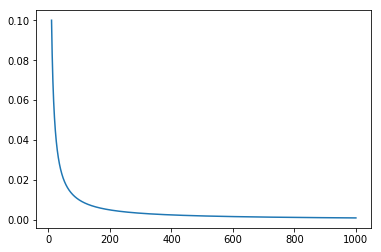

In [9]:
# plot 1/x
x = np.arange(10,1000,1/1000)
y = 1/x
plt.plot(x,y);

*Figure 1-2: A graph showing the function 1/x as the value of x increases*

We can find limits of functions in SymPy by creating objects of the `Limit` class as follows:

In [10]:
from sympy import Limit, Symbol, S #1
x = Symbol('x') #2
Limit(1/x, x, S.Infinity) #3

Limit(1/x, x, oo, dir='-')

At (1), we import the Limit and `Symbol` classes, as well as `S`, which is a special SymPy class that contains the definition of infinity (positive and negative) and other special values.  Then at (2) we create a symbol object, `x`, to represent $x$. We create the Limit object at (3), passing it three arguments: `1/x`, the variable `x`, and finally the value at which we want to calculate the function’s limit (infinity, given by `S.Infinity`).
The result is returned as an *unevaluated* object with the `oo` symbol denoting positive infinity and the `dir='-'` symbol specifying that we are approaching the limit from the negative side.
To find the value of the limit, we use the `doit()` method:

In [11]:
l = Limit(1/x, x, S.Infinity)
l.doit()

0

By default, the limit is found from a positive direction, unless the value at which the limit is to be calculated is positive or negative infinity. In the case of positive infinity, the direction is negative, and vice versa. You can change the default direction as follows:

In [12]:
Limit(1/x, x, 0, dir='-').doit()

-oo

Here, we calculate $$\lim_{x\to0} \frac{1}{x},$$

and as we approach 0 for x from the negative side, the value of the limit approaches negative infinity. On the other hand, if we approach 0 from the positive side, the value approaches positive infinity:

In [13]:
Limit(1/x, x, 0, dir='+').doit()

oo

The `Limit` class also handles functions with limits of indeterminate forms, $$\left(\frac{0}{0},\frac{inf}{inf}\right)$$ automatically:

In [14]:
from sympy import Symbol, sin
Limit(sin(x)/x, x, 0).doit()

1

You have very likely used l’Hopital’s rule to find such limits, but as we see here, the `Limit` class takes care of this for us.

### *Continuous Compound Interest*

Say you’ve deposited \$1 in a bank. This deposit is the *principal*, which pays you *interest* &mdash; in this case, interest of 100 percent that compounds `n` times yearly for 1 year. The amount you’ll get at the end of 1 year is given by $$A = \left(1+\frac{1}{n}\right)^n.$$ 

The prominent mathematician James Bernoulli discovered that as the value of $n$ increases, the term $(1 + 1/n)n$ approaches the value of $e$—the constant that we can verify by finding the limit of the function:

In [11]:
from sympy import Limit, Symbol, S
n = Symbol('n')
Limit((1+1/n)**n, n, S.Infinity).doit()

E

For any principal amount $p$, any rate $r$, and any number of years $t$, the compound interest is calculated using the formula 

$$A = P\left(1+\frac{r}{n}\right)^{nt}.$$

Assuming continuous compounding interest, we can find the expression for $A$ as follows:

In [12]:
from sympy import Symbol, Limit, S 
p = Symbol('p', positive=True)
r = Symbol('r', positive=True)
t = Symbol('t', positive=True)
Limit(p*(1+r/n)**(n*t), n, S.Infinity).doit()

p*exp(r*t)

We create three symbol objects, representing the principal amount, $p$, the rate of interest, $r$, and the number of years, $t$. We also tell SymPy that these symbols will assume positive values by passing the `positive=True` keyword argument while creating the `Symbol` objects. If we don’t specify, SymPy doesn’t know anything about the numerical values the symbol can assume and may not be able to evaluate the limit correctly. We then feed in the expression for the compound interest to create the `Limit` object and evaluate it using the `doit()` method. The limit turns out to be `p*exp(r*t)`, which tells us that the compound interest grows exponentially with time for the fixed rate of interest.

### *Instantaneous Rate of Change*

Consider a car moving along a road. It accelerates uniformly such that the distance traveled, $S$, is given by the function

$$S(t) = 5t2 + 2t + 8.$$

In this function, the independent variable is $t$, which represents the time elapsed since the car started moving.
If we measure the distance traveled in time $t_1$ and time $t_2$ such that $t_2 > t_1$, then we can calculate the distance moved by the car in 1 unit of time using the expression

$$\frac{S(t_2) - S(t_1)}{t_2-t_1}$$

This is also referred to as the average rate of change of the function $S(t)$ with respect to the variable $t$, or in other words, the average speed. If we write $t_2$ as $t_1 + \delta_t$—where $\delta_t$ is the difference between $t_2$ and $t_1$ in units of time—we can rewrite the expression for the average speed as

$$\frac{S(t_1 + \delta_t) - S(t_1)}{\delta_t}$$

This expression is also a function with t1 as the variable. Now, if we further assume δt to be really small, such that it approaches 0, we can use limit notation to write this as

$$\lim_{\delta_t\to0}\frac{S(t_1 + \delta_t) - S(t_1)}{\delta_t}$$

We will now evaluate the above limit. First, let’s create the various expression objects:

In [13]:
from sympy import Symbol, Limit
t = Symbol('t')
St = 5*t**2 + 2*t + 8 #1
t1 = Symbol('t1')
delta_t = Symbol('delta_t')
St1 = St.subs({t: t1}) #2
St1_delta = St.subs({t: t1 + delta_t}) #3

We first define the function#S(t)# at (1). Then, we define two symbols, `t_1` and `delta_t`, which correspond to $t_1$ and $\delta_t$. Using the `subs()` method, we then find S(t1) and $S(t_1 + \delta_t)$ by substituting in the value of `t` for `t1` and `t1_delta_t` at (2) and (3), respectively.

Now, let’s evaluate the limit:

In [14]:
Limit((St1_delta-St1)/delta_t, delta_t, 0).doit()

10*t1 + 2

The limit turns out to be `10*t1 + 2`, and it’s the rate of change of $S(t)$ at time `t1`, or the instantaneous rate of change. This change is more commonly referred to as the *instantaneous speed* of the car at the time instant `t1`.

The limit we calculated here is referred to as the *derivative* of a function, and we can calculate it directly using SymPy’s Derivative class.

# Programming Challenges

The following challenges build on what you’ve learned in this notebook. You cand find sample solutions in the solutions notebook.

## #1: Verify the Continuity of a Function at a Point

A necessary, but not sufficient, condition for a function to be differentiable at a point is that it must be continuous at that point. That is, the function must be defined at that point and its left-hand limit and right-hand limit must exist and be equal to the value of the function at that point. If $f(x)$ is the function and $x = a$ is the point we are interested in evaluating, this is mathematically stated as

$$\lim_{x\to a^+}f(x) = \lim_{x\to a^-}f(x) = f(a)$$

Your challenge here is to write a program that will (1) accept a single-variable function and a value of that variable as inputs and (2) check whether the input function is continuous at the point where the variable assumes the value input.

Here is a sample working of the completed solution:

`Enter a function in one variable: 1/x
Enter the variable: x
Enter the point to check the continuity at: 1 
1/x is continuous at 1.0`

The function $1/x$ is discontinuous at 0, so let’s check that:

`Enter a function in one variable: 1/x
Enter the variable: x
Enter the point to check the continuity at: 0 
1/x is not continuous at 0.0`

In [15]:
from sympy import Limit, Symbol, sympify, SimpifyError

def check_continuity(f, var, a):
    ''' Takes in a function, var, and value a, returns True is continuous at a, False if not '''
    l1 = Limit(f, var, a, dir='+').doit()
    l2 = Limit(f, var, a, dir='-').doit()
    f_a = f.subs({var: a})
    
    if l1 == l2 and f_a == l1:
        print('{0} is continuous at {1}'.format(f, a))
    else:
        print('{0} is not continuous at {1}'.format(f, a))

# Take inputs from user
f = input('Enter a function in one variable: ')
var = input('Enter the variable: ')
a = float(input('Enter the point to check the continuity at: '))

# Check for continuity
try:
    f = sympify(f)
except SympifyError:
    print('Invalid function entered')
    
else:
    var = Symbol(var)
    d = check_continuity(f, var, a)

ImportError: cannot import name 'SimpifyError'